## 1. Select and train the Regression Model:
There are several regression algorithms available, such as linear regression, decision tree regression, random forest regression, or support vector regression. In this task, you will select an appropriate regression model based on the nature of the problem and the characteristics of your dataset.

Training the Regression Model:

Using the training set prepared in the previous component, you will train the selected regression model. The model will learn the patterns and relationships between the input features and the fare amount.

In [1]:
from IPython import get_ipython
from IPython.display import display
# %%
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # Import mean_absolute_error


In [2]:
# Provide the correct path to the file on Google Drive
data_no_outliers = pd.read_csv('/content/drive/MyDrive/Menternship 2025/uber_cleaned.csv')

# Verify the data is loaded correctly
print(data_no_outliers.head())


   Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

             pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06+00:00        -73.999817        40.738354   
1  2009-07-17 20:04:56+00:00        -73.994355        40.728225   
2  2009-08-24 21:45:00+00:00        -74.005043        40.740770   
3  2009-06-26 08:22:21+00:00        -73.976124        40.790844   
4  2014-08-28 17:47:00+00:00        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  hour  day_of_week  \
0         -73.999512         40.723217                1    19            3   
1         -73.994710         40.750325                1    20            4

## Define Features and Target Variable:
Select your features (independent variables) and target variable (dependent variable).

In [3]:
# Select the relevant features
X = data_no_outliers[['distance_km', 'hour', 'passenger_count']]

# Target variable
y = data_no_outliers['fare_amount']


## Split the Data into Training and Testing Sets:
Split the data into training and testing sets (typically 70-30 or 80-20).

In [4]:
# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

As in 2nd components output a stronger correlation (0.5553) and a clearer trend in the scatter plot indicate that a linear regression model is appropriate for capturing this relationship.

## Linear Regression:

In [21]:
# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
linear_r2 = r2_score(y_test, y_pred_linear)
linear_mse = mean_squared_error(y_test, y_pred_linear)

print(f"Linear Regression R²: {linear_r2}")
print(f"Linear Regression MSE: {linear_mse}")



Linear Regression R²: 0.3341510526819308
Linear Regression MSE: 21.90990962776344


## Random Forest Regression:
For a more powerful model, you can try Random Forest Regression:

In [20]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regressor model
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

# Make predictions
y_pred_forest = forest_model.predict(X_test)

# Evaluate the model
forest_r2 = r2_score(y_test, y_pred_forest)
forest_mse = mean_squared_error(y_test, y_pred_forest)

print(f"Random Forest Regression R²: {forest_r2}")
print(f"Random Forest Regression MSE: {forest_mse}")


Random Forest Regression R²: 0.3201790115200914
Random Forest Regression MSE: 22.369662790105018


In [22]:
# Predict the fare amount for the test data
y_pred = model.predict(X_test)
print(y_pred)

[ 6.84677254  6.73137597 18.00617886 ...  9.34968537 11.10200991
  6.79939299]


## 2. Evaluate the Regression Model:
Once the model is trained, it's crucial to evaluate its performance to assess how well it can predict the fare amount for unseen data.

In this task, you will use evaluation metrics such as mean squared error (MSE), mean absolute error (MAE), or R-squared to quantify the model's performance.

In [7]:
# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared score

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 2.2220997092516073
Mean Squared Error: 21.90990962776344
R-squared: 0.3341510526819308


##Visualize the Results:
Visualize the model’s predictions against the actual values using a scatter plot and line plot:

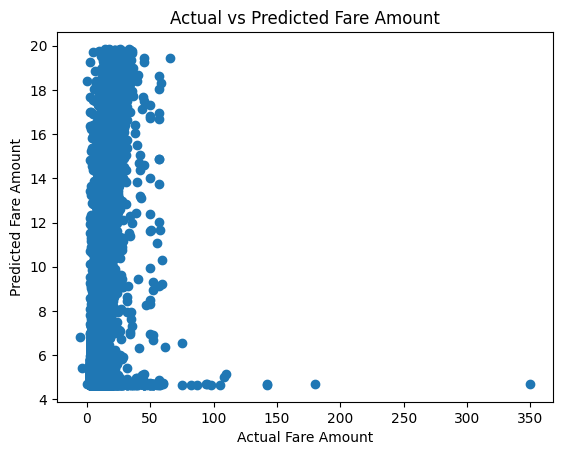

In [26]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Fare Amount')
plt.ylabel('Predicted Fare Amount')
plt.title('Actual vs Predicted Fare Amount')
plt.show()


## 3. Fine-tuning the Model:
To further improve the model's performance, you can fine-tune its hyperparameters. Hyperparameters are configuration settings that determine the behavior of the model during training.

You can use techniques like grid search or random search to find the optimal combination of hyperparameters that minimizes the prediction error.

In [9]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Steps to fine-tune the model with GridSearchCV:

### Set up hyperparameter grid:
For Ridge Regression

In [10]:
ridge = Ridge()

# Define hyperparameters grid for Ridge
param_grid_ridge = {
    'alpha': [0.1, 1, 10, 100]  # Regularization strengths to test
}

For Lasso Regression:

In [11]:
lasso = Lasso()

# Define hyperparameters grid for Lasso
param_grid_lasso = {
    'alpha': [0.1, 1, 10, 100]  # Regularization strengths to test
}

### Perform Grid Search for Ridge and Lasso:
For Ridge

In [12]:
grid_search_ridge = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_ridge.fit(X_train, y_train)

print(f"Best parameters for Ridge: {grid_search_ridge.best_params_}")
print(f"Best score for Ridge: {grid_search_ridge.best_score_}")


Best parameters for Ridge: {'alpha': 10}
Best score for Ridge: -24.73367769347511


For Lasso:

In [13]:
grid_search_lasso = GridSearchCV(lasso, param_grid_lasso, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_lasso.fit(X_train, y_train)

print(f"Best parameters for Lasso: {grid_search_lasso.best_params_}")
print(f"Best score for Lasso: {grid_search_lasso.best_score_}")


Best parameters for Lasso: {'alpha': 0.1}
Best score for Lasso: -24.73637788243486


### Evaluate the best model from Grid Search:
Once you have the best hyperparameters, you can evaluate the model on the test set.

For Ridge

In [14]:
# Get the predictions for Ridge
y_pred_ridge = grid_search_ridge.predict(X_test)

# Evaluate the performance of Ridge
print(f"Ridge - Mean Absolute Error: {mean_absolute_error(y_test, y_pred_ridge)}")
print(f"Ridge - Mean Squared Error: {mean_squared_error(y_test, y_pred_ridge)}")
print(f"Ridge - R-squared: {r2_score(y_test, y_pred_ridge)}")


Ridge - Mean Absolute Error: 2.222110269381116
Ridge - Mean Squared Error: 21.9099162182016
Ridge - R-squared: 0.3341508523964716


For Lasso:

In [15]:
# Get the predictions for Lasso
y_pred_lasso = grid_search_lasso.predict(X_test)

# Evaluate the performance of Lasso
print(f"Lasso - Mean Absolute Error: {mean_absolute_error(y_test, y_pred_lasso)}")
print(f"Lasso - Mean Squared Error: {mean_squared_error(y_test, y_pred_lasso)}")
print(f"Lasso - R-squared: {r2_score(y_test, y_pred_lasso)}")


Lasso - Mean Absolute Error: 2.2307585159450367
Lasso - Mean Squared Error: 21.920125490648836
Lasso - R-squared: 0.3338405894411529


## Fine-tuning ElasticNet and Randomized Search:
Here’s how you can perform further tuning using ElasticNet and RandomizedSearchCV for hyperparameter optimization.

python
Copy code


In [29]:
# Import necessary libraries
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import uniform
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore", category=UserWarning)

# Define the ElasticNet model
elastic_net = ElasticNet()

# Define the parameter distributions for RandomizedSearchCV
# 'alpha': Regularization strength (positive values only)
# 'l1_ratio': The mix ratio between L1 (Lasso) and L2 (Ridge), valid range is [0.0, 1.0]
param_distributions = {
    'alpha': uniform(0.01, 10),  # Random values in the range [0.01, 10]
    'l1_ratio': uniform(0, 1)    # Random values in the range [0, 1]
}

# Set up RandomizedSearchCV with 50 iterations for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=elastic_net,                # ElasticNet model
    param_distributions=param_distributions,  # Parameter distributions to sample from
    scoring='neg_mean_squared_error',     # Use negative MSE as the scoring metric
    cv=5,                                 # 5-fold cross-validation
    n_iter=50,                            # Number of random configurations to try
    random_state=42                       # Set seed for reproducibility
)

# Fit the RandomizedSearchCV on the training data
random_search.fit(X_train, y_train)

# Output the best hyperparameters and their corresponding score
print("Best parameters for ElasticNet (Random Search):", random_search.best_params_)
print("Best score for ElasticNet (Random Search):", random_search.best_score_)

# Retrieve the best model from the search
best_elastic_net = random_search.best_estimator_

# Make predictions using the best model on the test set
y_pred = best_elastic_net.predict(X_test)

# Evaluate the model's performance on the test set
print("ElasticNet - Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("ElasticNet - Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("ElasticNet - R-squared:", r2_score(y_test, y_pred))


Best parameters for ElasticNet (Random Search): {'alpha': 0.06522117123602399, 'l1_ratio': 0.8154614284548342}
Best score for ElasticNet (Random Search): -24.735240623442174
ElasticNet - Mean Absolute Error: 2.2287092396151613
ElasticNet - Mean Squared Error: 21.917491104627956
ElasticNet - R-squared: 0.3339206492491865


## Conclusion:
The ElasticNet model performs slightly better than Lasso and Ridge:

MAE and MSE are slightly lower.
R-squared is marginally higher.
Regularization: The tuned hyperparameters suggest a strong emphasis on sparsity (L1 regularization), which means that the model likely identified a subset of the most relevant features while reducing overfitting.

In [30]:
# Add a file name to the path
data_no_outliers.to_csv('/content/drive/MyDrive/Menternship 2025/regression_modelling.csv', index=False)